In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.metrics import mean_squared_error

### 1. Dataset
Load the prostate dataset. 

In [79]:
#TODO 
train = None 
train_data = pd.read_csv("data/prostate_train.csv")
print(train_data)


test = None 
test_data = pd.read_csv("data/prostate_test.csv")
print(test_data.head())


      lcavol   lweight       age      lbph       svi       lcp   gleason  \
0  -0.463811 -0.320162 -0.099473  0.371499 -0.533063 -0.836769 -1.031712   
1   0.107378 -1.052333  0.433703  0.156229 -0.533063 -0.836769 -1.031712   
2  -1.379352  0.503296  0.300409  1.192229 -0.533063 -0.836769  0.378996   
3  -0.910332  0.374171  0.033821  1.115911 -0.533063 -0.836769 -1.031712   
4  -0.004152  1.035966 -0.099473  1.434694 -0.533063 -0.836769  0.378996   
..       ...       ...       ...       ...       ...       ...       ...   
62 -0.086530 -0.386253 -1.032532 -0.995955 -0.533063 -0.154619  0.378996   
63  1.737077  0.732039  0.433703  0.250616  1.847952  2.226237  0.378996   
64 -0.096226  2.421891  0.966879  1.540569 -0.533063 -0.417141  0.378996   
65  0.241382 -1.265727 -0.232767 -0.995955 -0.533063 -0.273880  0.378996   
66 -0.123509 -0.598016  1.633350  1.146281 -0.533063 -0.836769  0.378996   

       pgg45      lpsa  
0  -0.896487  0.765468  
1  -0.896487  1.766442  
2  -0.213934

We will use the target $y=$lpsa throughout this exercise, and all other features as predictors $X$, so split the train and test sets by $X,y$.

In [80]:
#TODO
ytrain = train_data['lpsa']
Xtrain = train_data.drop('lpsa', axis='columns') ### getting Xtrain data set
#print(type(ytrain))
ytrain = ytrain.to_numpy()
ytrain = ytrain.reshape(-1, 1)
print(ytrain.shape)
print(Xtrain)


ytest = test_data['lpsa']
Xtest = test_data.drop('lpsa', axis='columns') ### getting Xtest data set
#print(ytest)
ytest = ytest.to_numpy()
print((ytest))
print(ytest.shape)
ytest = ytest.reshape(-1,1)
print(ytest.shape)
print(Xtest)

(67, 1)
      lcavol   lweight       age      lbph       svi       lcp   gleason  \
0  -0.463811 -0.320162 -0.099473  0.371499 -0.533063 -0.836769 -1.031712   
1   0.107378 -1.052333  0.433703  0.156229 -0.533063 -0.836769 -1.031712   
2  -1.379352  0.503296  0.300409  1.192229 -0.533063 -0.836769  0.378996   
3  -0.910332  0.374171  0.033821  1.115911 -0.533063 -0.836769 -1.031712   
4  -0.004152  1.035966 -0.099473  1.434694 -0.533063 -0.836769  0.378996   
..       ...       ...       ...       ...       ...       ...       ...   
62 -0.086530 -0.386253 -1.032532 -0.995955 -0.533063 -0.154619  0.378996   
63  1.737077  0.732039  0.433703  0.250616  1.847952  2.226237  0.378996   
64 -0.096226  2.421891  0.966879  1.540569 -0.533063 -0.417141  0.378996   
65  0.241382 -1.265727 -0.232767 -0.995955 -0.533063 -0.273880  0.378996   
66 -0.123509 -0.598016  1.633350  1.146281 -0.533063 -0.836769  0.378996   

       pgg45  
0  -0.896487  
1  -0.896487  
2  -0.213934  
3  -0.896487  
4  -

### 2. Ridge Regression
Perform Ridge regression with target lpsa and all other features as predictors. Do so for different regularization parameters $\lambda$.
Plot the resulting coefficients depending on $\lambda$, as in ISLR, p.238, Fig. 6.4.

(200, 8)
(200, 1)


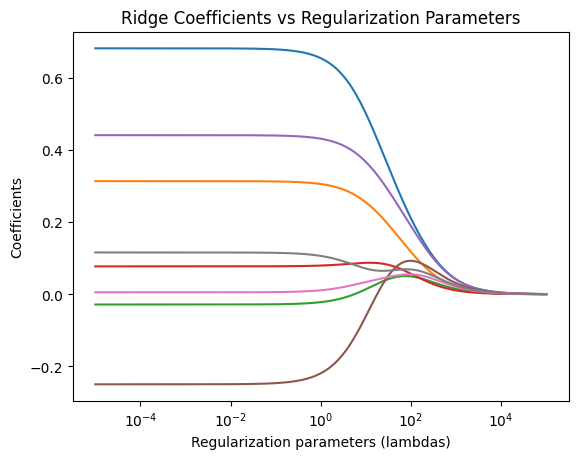

In [81]:
from sklearn.linear_model import Ridge  
    
### fitting ridge model to different values of lambdas ------------------------------------------------------
# This is an example of possible values for the lambda that you can consider.--------------------------------
lambdas = np.logspace(-5, 5, 200)
#print(lambdas)
coef_list = []
pred_list = []


fig = plt.plot()
ax = plt.gca()

for l in lambdas:
    ridge_model = Ridge(l)
    ridge_model.fit(Xtrain, ytrain)
    #print(ridge_model.coef_)
    #print(ytrain.shape)
    ridge_model.predict(Xtrain)
    #print(type(ridge_model.coef_))
    
    
    coef_list.append(ridge_model.coef_)
    #ax.plot(lambdas, coef_list)
    


coef_list = np.array(coef_list)
coef_list = np.squeeze(coef_list)
#coef_list = coef_list.reshape(-1,1)
print((coef_list.shape))
lambdas = lambdas.reshape(-1,1)
print((lambdas.shape))

### plotting the resulting coefficients as function of lambdas-----------------------------------------------
fig = plt.plot()
#sb = fig.subplots(111)
ax = plt.subplot(111)
ax = plt.gca()
ax.set_xscale("log")
ax.plot(lambdas, coef_list)
ax.set_xlabel('Regularization parameters (lambdas)')
ax.set_ylabel('Coefficients')
ax.set_title('Ridge Coefficients vs Regularization Parameters')
plt.show()

#TODO

From the figure above, we notice that as the values of lambda(regularization paramter) increases, the coefficients of the predictors are converging to zero. Basically, for sufficiently large value of lambda all coefficients are zero which means that there are no predictors and hence this modle is null model.

### 3. Cross Validation & Ridge
Perform 10-fold cross-validation on the training set to determine the optimal value for $\lambda$ for the ridge regression model.

In [82]:
from sklearn.model_selection import KFold

# K-fold cross validation -----------------------------------------------------------
folds = 10
cv = KFold(folds)
#print(Xtrain)

scores = []

### finding optimal regularization paramter for Lasso --------------------------------
MSE = 100000


for l in lambdas:
    ridge_model = Ridge(l)
    KFold_MSE = []
    
    for train_data, test_data in cv.split(Xtrain):
        #print(train_data)
        #print(Xtrain[train_data])
        #print(Xtrain.iloc[train_data,:])
        Xtrain1, ytrain1 = Xtrain.iloc[train_data,:], ytrain[train_data]
        Xtest1, ytest1 = Xtrain.iloc[test_data, :], ytrain[test_data]
        ridge_model.fit(Xtrain1, ytrain1)
        pred_ytest1 = ridge_model.predict(Xtest1)
        #score = ridge_model.score(Xtest1, ytest1)
        scores.append(ridge_model.score(Xtest1, ytest1))
        KFold_MSE.append(mean_squared_error(ytest1, pred_ytest1))
    avg_MSE = sum(KFold_MSE)/len(KFold_MSE)
    if avg_MSE < MSE:
        MSE = avg_MSE
        optimal_lambda = l
#        print(accuracy)

print(np.sqrt(MSE))
print(optimal_lambda) ### 3.37


    

#TODO

0.8693105449891878
[3.37006433]


Report train and test error measured in MSE for this $\lambda$.

In [83]:
### fitting ridge model to train and test data for the optimal lamda -----------------

print(optimal_lambda)
ridge_model = Ridge(optimal_lambda)
ridge_model.fit(Xtrain, ytrain)
pred_ytrain = ridge_model.predict(Xtrain)
pred_ytest = ridge_model.predict(Xtest)
MSE_train = mean_squared_error(ytrain, pred_ytrain)
MSE_test = mean_squared_error(ytest, pred_ytest)
print(np.sqrt(MSE_train)) ###  0.69
print(np.sqrt(MSE_test)) ### 0.67

print(ridge_model.coef_[0])
pd.Series(ridge_model.coef_[0], index=Xtrain.columns)

[3.37006433]
0.6916155310866221
0.6699905544077903
[ 0.60058741  0.28883206 -0.00918138  0.08317302  0.41029149 -0.16091381
  0.02044968  0.0902805 ]


lcavol     0.600587
lweight    0.288832
age       -0.009181
lbph       0.083173
svi        0.410291
lcp       -0.160914
gleason    0.020450
pgg45      0.090281
dtype: float64

### 4. Lasso Regression
Perform Lasso regression with target lpsa and all other features as predictors. Do so for different parameters $\lambda$.

Plot the resulting coefficients depending on $\lambda$, as in ISLR, p.242, Fig. 6.6.

(200, 1)


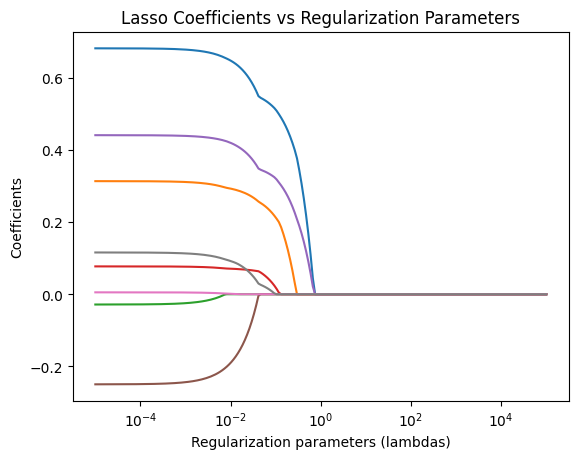

In [84]:
from sklearn.linear_model import Lasso



### fitting Lasso model to different values of lambdas ------------------------------------------------------

lambdas = np.logspace(-5,5,200)
coef_list = []
pred_list = []

for l in lambdas:
    
    lasso = Lasso(l)
    lasso.fit(Xtrain, ytrain)
    lasso.predict(Xtrain)
    coef_list.append(lasso.coef_)

coef_list = np.array(coef_list)
coef_list = np.squeeze(coef_list)
#coef_list = coef_list.reshape(-1,1)
#print((coef_list))
lambdas = lambdas.reshape(-1,1)
print((lambdas.shape))


### plotting the resulting coefficients as function of lambdas-----------------------------------------------
fig = plt.plot()
#sb = fig.subplots(111)
sb = plt.subplot(111)
sb = plt.gca()
sb.set_xscale("log")
sb.plot(lambdas, coef_list)
sb.set_xlabel('Regularization parameters (lambdas)')
sb.set_ylabel('Coefficients')
sb.set_title('Lasso Coefficients vs Regularization Parameters')
plt.show()




In the figure above, we see that initially, lasso model have all the predictors with non zero coefficient values respectively. However, as the values of lambda increase some of the coefficients starting acquiring value zero while other still remain small but non zero.   

Ridge Model vs Lasso Model:
1. Ridge Model: coefficients of all predictors are simultaneously decreasing and hence converging to zero 

   Lasso Model: coefficients of all predictors are not decreasing simultaneously as we can see some coefficients of predictors    are becoming zero easlier than other coefficient value of other predictors.
   
2. Ridge Model: Throughout the fitting process, all the predcitors are including in the model. For high value of lambda,
   coefficient values are close to zero and hardly becoming zero.

   Lasso model: This model removes un-important predictors from the model by making their coefficients zero.
   
The reson is this that lasso is using L1 norm while ridge is using L2 norm.

## 5. Cross Validation & Lasso
Perform 10-fold cross-validation on the training set to determine the optimal value for $\lambda$ in the Lasso.
		Report train and test error measured in MSE for this $\lambda$. 

In [85]:
# K-fold cross validation --------------------------------------------------------------

folds = 10
cv = KFold(folds)
#print(Xtrain)
scores = []

### finding optimal regularization paramter for Lasso ---------------------------------

lambdas = np.logspace(-5,5,200)
MSE = 100000

for l in lambdas:
    lasso = Lasso(l)
    KFold_MSE = []
    
    for train_data, test_data in cv.split(Xtrain):
        #print(train_data)
        #print(Xtrain[train_data])
        #print(Xtrain.iloc[train_data,:])
        Xtrain1, ytrain1 = Xtrain.iloc[train_data,:], ytrain[train_data]
        Xtest1, ytest1 = Xtrain.iloc[test_data, :], ytrain[test_data]
        lasso.fit(Xtrain1, ytrain1)
        pred_ytest1 = lasso.predict(Xtest1)
        scores.append(lasso.score(Xtest1, ytest1))
        KFold_MSE.append(mean_squared_error(ytest1, pred_ytest1))
    avg_MSE = sum(KFold_MSE)/len(KFold_MSE)
    if avg_MSE < MSE:
        MSE = avg_MSE
        optimal_lambda = l
#        print(lasso.coef_)

print(MSE)
print(optimal_lambda) ### 0.018


        
        
        
#print(scores)
        


0.7473037042820396
0.018464249428955443


In [86]:
### fitting ridge model to train and test data for the optimal lamda -----------------

#print(optimal_lambda[0])
#optimal_lambda = optimal_lambda[0]
print(optimal_lambda)
lasso_model = Lasso(optimal_lambda)
lasso_model.fit(Xtrain, ytrain)
pred_ytrain = lasso_model.predict(Xtrain)
pred_ytest = lasso_model.predict(Xtest)
MSE_train = mean_squared_error(ytrain, pred_ytrain)
MSE_test = mean_squared_error(ytest, pred_ytest)
print(np.sqrt(MSE_train)) ###  0.69
print(np.sqrt(MSE_test)) ### 0.68
#lasso_model.coef_
print(lasso_model.intercept_) ### 2.45
#print(lasso_model.coef_[lasso_model.coef_ != 0])
pd.Series(lasso_model.coef_, index=Xtrain.columns)

0.018464249428955443
0.6924661586709665
0.6715431138906758
[2.45027528]


lcavol     0.621091
lweight    0.282969
age        0.000000
lbph       0.068847
svi        0.400184
lcp       -0.140174
gleason    0.000000
pgg45      0.075941
dtype: float64

How many and which features are used?
		Compare this to the coefficients determined for ridge regression in part 3 of this exercise.

Here, we see that in Lasso model fit, predictor names 'age' is not used and also gleason is removed by giving their coefficient value as zero. Only 6 features are used for fitting the Lasso model.
While in Ridge regression model, all coeficient values are non zero and hence all predictors are used for fitting the model.

## 6. 

Compare the performance, in terms of MSE, of the best models in parts 3. and 5. Which model would you choose and why? What alternative model could have been used?

In terms of MSE, both models perform in a similar manner.